# Pymaceuticals Inc.
---

### Analysis

- In this study 249 mice, who were identified with squamous cell carcinoma (SCC), received treatment over the course of 45 days with the following range of drug regimen: Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Placebo, Propriva, Ramicane, Stelasyn, Zoniferol. Over the days, the tumor development was observed and measured. The purpose of the study is to compare the performance of Pymaceutical's drug of interest, Capomulin, against the other drugs.
- The number of mice treated for each drug varied, with the highest number being treated by Capomulin (230) followed by Ramicane (228), thereafter all other treatments were with less than 200 mice; the lowest number of mice studied being on Propriva (148).
- With respect to the tumor volumes, statistically Capomulin recorded very similar results to Ramicane and in fact had slighlty higher tumor volumes across mean to standard deviation values. 
- The Box plot across the four regimens of interest shows the final volume of the tumor trended lower for Capomulin and Ramicane, and again Ramicane results were the lowest overall for tumor volume.
- For mouse ID s185, treated with Capomulin, it can be seen that tumor volume does decrease over time (also noticeable was that the female mice showed a greater reduction in tumor volume than male mice r157).
- Correlation value between Capomulin with average weight and final tumor volume is 0.84, so one can see there is a strong positive correlation between these two variables. This indicates the tumor volume is related to the weight of the mouse on average.
- We can summise that Capomulin does on average reduce the size of tumors in the mice. However, it should be noted to have the most fair tests, the variables should be equal and with equal treatment. To ensure more accurate results, the same number of mice treated per regimen should be considered.


In [1]:
# ANALYSIS #

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
Mouse_metadata_path = "Mouse_metadata.csv"
Study_results_path = "Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(Mouse_metadata_path)
study_results = pd.read_csv(Study_results_path)

In [4]:
# Combine the data into a single dataset
merge_mouse_data = pd.merge(mouse_metadata,study_results, how = 'outer', on= ['Mouse ID', 'Mouse ID'])
# Display the data table for preview
merge_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice
len(merge_mouse_data["Mouse ID"].unique())

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = merge_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicated_mice_ID = merge_mouse_data.loc[duplicate_mice, 'Mouse ID'].unique()
duplicated_mice_ID


array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID
duplicated_mice_ID_data = merge_mouse_data.loc[merge_mouse_data['Mouse ID'] == duplicated_mice_ID[0]]
duplicated_mice_ID_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_merge_mouse_data = merge_mouse_data.drop(duplicated_mice_ID_data.index)
cleaned_merge_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_merge_mouse_data["Mouse ID"].unique())

248

In [10]:
# SUMMARY STATISTICS #

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_df = cleaned_merge_mouse_data.groupby("Drug Regimen")
drug_regimen_df

In [11]:
# Mean, median, variance, standard deviation, and SEM of the tumor volume

# mean
mean_tvol = drug_regimen_df["Tumor Volume (mm3)"].mean()
# median
median_tvol = drug_regimen_df["Tumor Volume (mm3)"].median()
# variance
variance_tvol = drug_regimen_df["Tumor Volume (mm3)"].var()
# standard deviation (std)
std_tvol = drug_regimen_df["Tumor Volume (mm3)"].std()
# standard error mean (SEM)
SEM_tvol = drug_regimen_df["Tumor Volume (mm3)"].sem()


In [12]:
# Assemble the resulting series into a single summary DataFrame
statistics_summary_drugregimen_pertvol = pd.DataFrame({
    "Mean": mean_tvol,
    "Median": median_tvol,
    "Variance": variance_tvol,
    "Standard Deviation": std_tvol,
    "Standard Error Mean": SEM_tvol   
})

statistics_summary_drugregimen_pertvol

,Mean,Median,Variance,Standard Deviation,Standard Error Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_table = drug_regimen_df["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_table


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# BAR AND PIE CHARTS #

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen

# Calculate number of mice per drug regimen
mice_per_drug_regimen = drug_regimen_df["Mouse ID"].count()
mice_per_drug_regimen

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

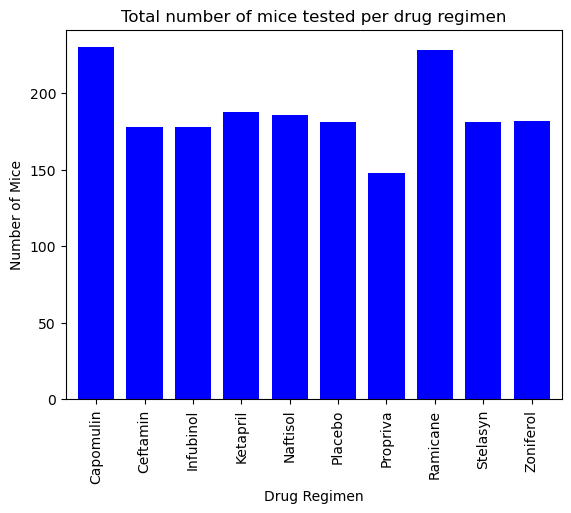

In [15]:
# Generate bar graph using PANDAS
plot_mice_per_regimen = mice_per_drug_regimen.plot(kind='bar', facecolor='blue', width=0.75,
                                                  title="Total number of mice tested per drug regimen",
                                                  xlabel="Drug Regimen",
                                                  ylabel="Number of Mice")

# show bar graph
plt.tight_layout
plt.show()

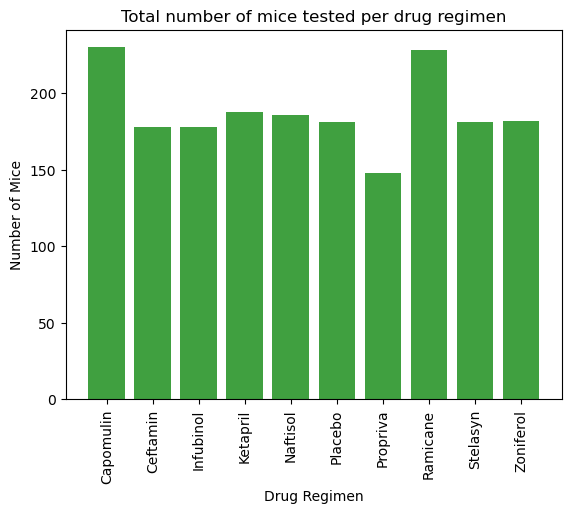

In [16]:
# Generate bar graph using PYPLOT (need to import numpy as py to use np)

# set x axis and tick locations
x_axis_drug_regimen = np.arange(len(mice_per_drug_regimen))
drug_regimen_name = list(mice_per_drug_regimen.index.values)
plt.xticks(x_axis_drug_regimen, drug_regimen_name, rotation="vertical")

# x,y labels and title
plt.title("Total number of mice tested per drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

# create py bar chart
pyplot_mice_per_regimen = plt.bar(x_axis_drug_regimen, mice_per_drug_regimen, color = "green", alpha = 0.75, align = "center")

# show py bar graph
plt.show()

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pyplot and Pandas

# Using groupby calculate number of male vs female in mice
sex_mice = cleaned_merge_mouse_data.groupby("Sex")["Sex"].count()
sex_mice

Sex
Female    922
Male      958
Name: Sex, dtype: int64

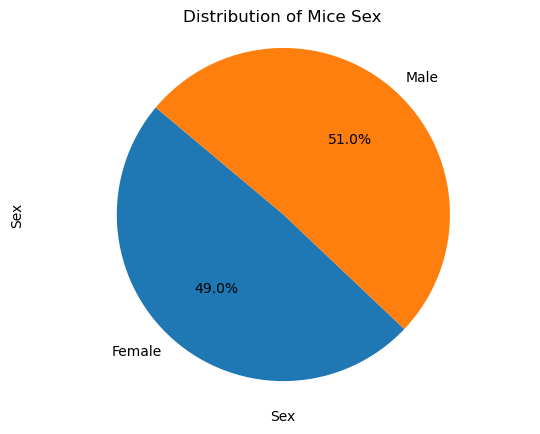

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas and Pyplot

# Generate pie chart with PANDAS
pie_chart_mice_sex = sex_mice.plot(kind = "pie", autopct = "%1.1f%%", startangle = 140)

# Create x, label and title
pie_chart_mice_sex.set_xlabel("Sex")
pie_chart_mice_sex.set_title("Distribution of Mice Sex")

# To make perfect circle
plt.axis("equal")

plt.show()

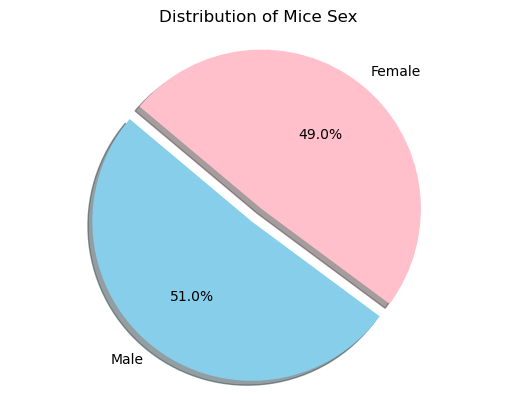

In [19]:
# Generate the pie chart using PYPLOT
sex = ["Male", "Female"]
numbers = [958, 922]
colors = ["skyblue", "pink"]
explode = (0.1,0)

# Plot title and pie chart
plt.title("Distribution of Mice Sex")
plt.pie(numbers, explode = explode, labels = sex, colors = colors, shadow = True, startangle= 140, autopct = "%1.1f%%")
plt.axis("equal")
plt.show()

In [20]:
# QUARTILE, OUTLIERS AND BOXPLOTS #

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# (i)Capomulin (ii) Ramicane (iii) Infubinol (iv) Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

max_timepoint_df = cleaned_merge_mouse_data.groupby(["Mouse ID"]).max()[["Timepoint"]].reset_index()
timepoint_df = pd.merge(max_timepoint_df,cleaned_merge_mouse_data,how = "left", on = ["Mouse ID", "Timepoint"])
timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = timepoint_df.loc[timepoint_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data_list.append(final_tumor_vol)
    
    # Specify quantiles to calculate quartiles and IQR
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    print(drug,outliers)

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


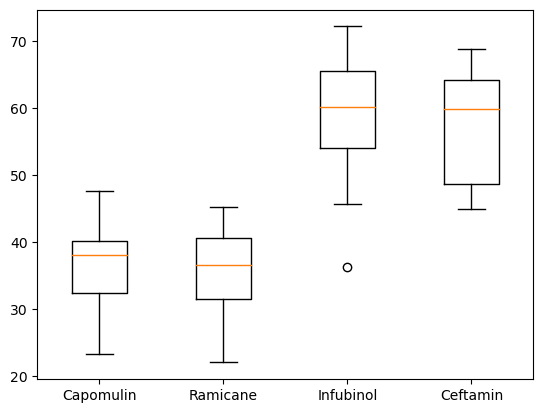

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data_list,labels = regimen)
plt.show()

In [23]:
# LINE AND SCATTER PLOTS #

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = cleaned_merge_mouse_data.loc[cleaned_merge_mouse_data["Drug Regimen"] == "Capomulin"]
Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


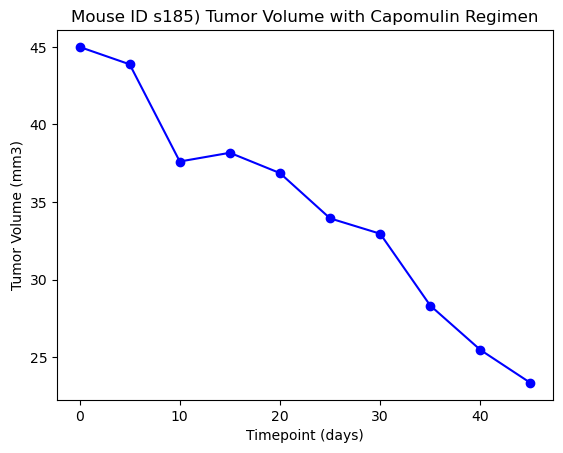

In [24]:
# Specify a mouse and get its data
mouse_id = 's185'
mouse_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == mouse_id]
                            
# Generate a line plot
time_vol = plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"], marker = "o", color = "blue")
plt.title(f"Mouse ID {mouse_id}) Tumor Volume with Capomulin Regimen")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)") 
                            
plt.show()

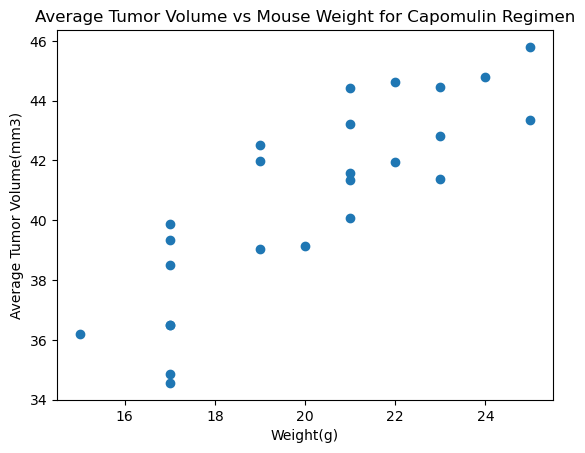

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_avg_tvol_vs_weight = Capomulin_df.groupby("Mouse ID").mean()
mice_weight = Capomulin_avg_tvol_vs_weight["Weight (g)"]
mice_tumor = Capomulin_avg_tvol_vs_weight["Tumor Volume (mm3)"]

# create scatter plot
plt.scatter(mice_weight, mice_tumor)

plt.title ("Average Tumor Volume vs Mouse Weight for Capomulin Regimen")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume(mm3)")

plt.show()


Correlation between mouse weight and tumor volume is 0.841936342469472


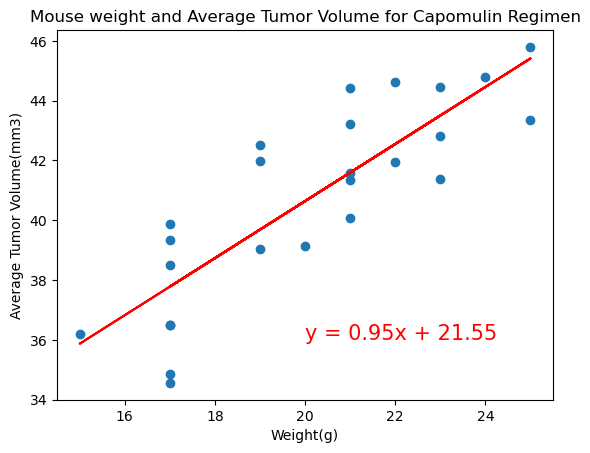

In [26]:
# CORRELATION AND REGRESSION #

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# define x and y values
x_values = mice_weight
y_values = mice_tumor

# correlation calculation
correlation = st.pearsonr(x_values, y_values)
print(f"Correlation between mouse weight and tumor volume is {correlation[0]}")

# linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# y = mx + b
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# show results, label x,y and title
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Mouse weight and Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.show()